In [5]:
import igraph as ig
import networkx as nx
import numpy as np
import pandas as pd
import time, os
from math import comb
from random import uniform, seed, choice
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from copy import deepcopy
from itertools import combinations
from IMGraph import IMGraph
from utils import *
from vis_functions import vis_methods_spread, vis_methods_time

In [6]:
os.makedirs("./figures/", exist_ok=True)

In [14]:
# For autodl
dolphin_file_name = "./data/dolphins/dolphins.gml"
hens_file_name = "./data/hens/aves-hens-pecking-order.edges"
songbird_file_name = "./data/songbird/aves-songbird-social.edges"
wiki_vote_file_name = "./data/wiki_vote/soc-wiki-Vote.mtx"
sparrow_file_name = "./data/sparrow/aves-sparrow-social.edges"
retweet_file_name = "./data/retweet/rt-retweet.mtx"
dataset_names = [
    "dolphin",
    "hens",
    "songbird",
    "sparrow",
    "retweet"
]

is_directed = [
    False,
    False,
    False,
    False,
    True
]

dataset_list = [
    dolphin_file_name,
    hens_file_name,
    songbird_file_name,
    sparrow_file_name,
    retweet_file_name
]

In [7]:
dolphin_file_name = "/Users/chenxiaolong/Desktop/ddm/5056/final/dolphins/dolphins.gml"
hens_file_name = "./data/aves-hens-pecking-order/aves-hens-pecking-order.edges"
songbird_file_name = "./data/aves-songbird-social/aves-songbird-social.edges"
wiki_vote_file_name = "./data/soc-wiki-Vote/soc-wiki-Vote.mtx"
sparrow_file_name = "./data/aves-sparrow-social/aves-sparrow-social.edges"
retweet_file_name = "./data/rt-retweet/rt-retweet.mtx"
dataset_names = [
    "dolphin",
    "hens",
    "songbird",
    "sparrow",
    "retweet"
]
is_directed = [
    False,
    False,
    False,
    False,
    True
]
dataset_list = [
    dolphin_file_name,
    hens_file_name,
    songbird_file_name,
    sparrow_file_name,
    retweet_file_name
]

In [8]:
# Cell to test file input
for i in range(len(dataset_names)):
    cur_file = dataset_list[i]
    IM_G = IMGraph(cur_file, mc=1000,directed=is_directed[i])
    

In [29]:
print(IM_G.G.density())
print(nx.density(IM_G.G_nx))

0.012828947368421053
0.012828947368421053


Number of MC simulations for RIS: 3000


100%|██████████| 4/4 [00:35<00:00,  8.77s/it]


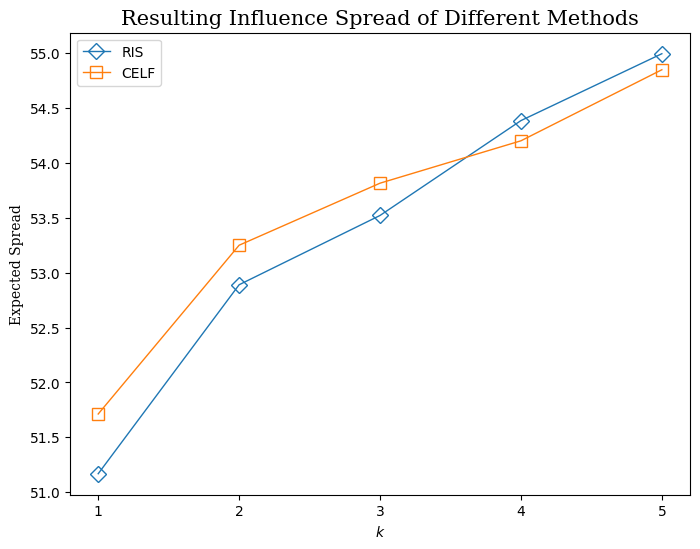

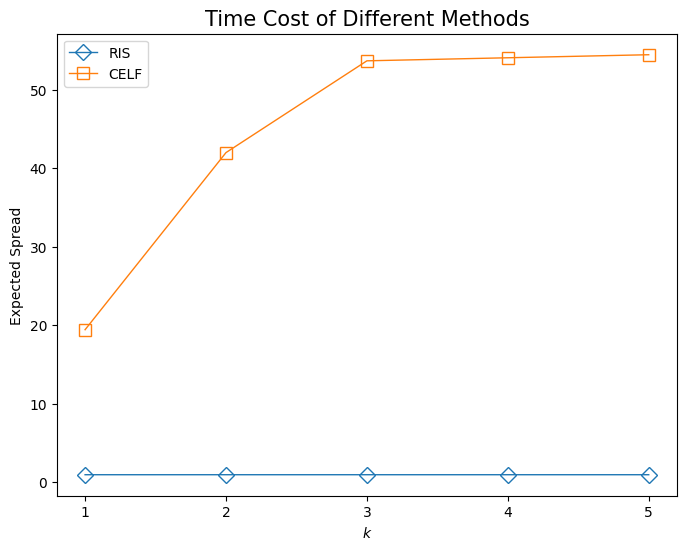

In [6]:
np.random.seed(5001)
for i in range(len(dataset_list)):
    file_path = dataset_list[i]
    IM_G = IMGraph(file_path, mc=1000)
    IM_G.run_RIS(num_mc=3000)
    IM_G.estimate_spread("RIS")
    # IM_G.run_proxy_methods()
    # IM_G.run_greedy()
    IM_G.run_celf()
    
    vis_methods_spread(IM_G, save_to_path=f"./figures/method_spread_{dataset_names[i]}.eps")
    vis_methods_time(IM_G, save_to_path=f"./figures/method_time_{dataset_names[i]}.eps")

In [6]:
IM_G.method_seed_idx
# IM_G.method_spread_map

{'RIS': [45, 60, 48, 22, 4], 'CELF': [1, 14, 6, 60, 0]}

In [9]:
IM_G.run_TIM()
IM_G.estimate_spread("TIM")

110019


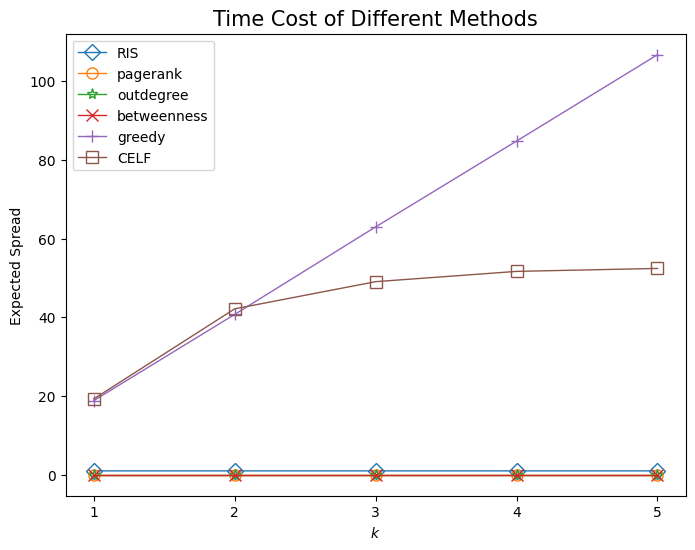

In [5]:
vis_methods_time(IM_G)

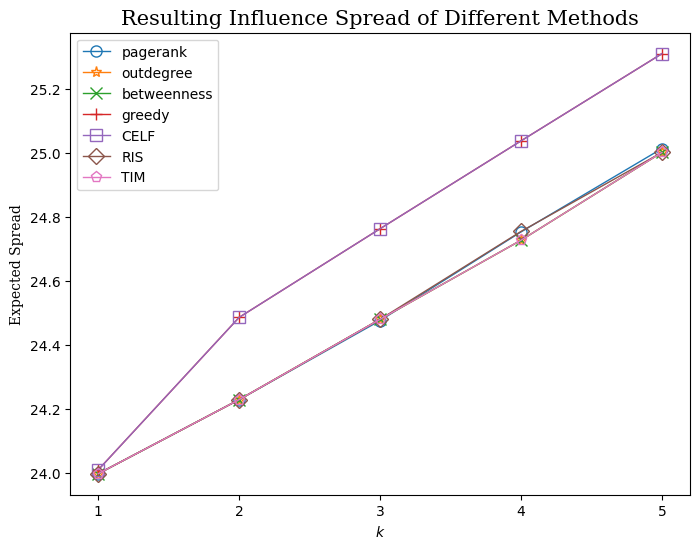

In [27]:
vis_methods_spread(IM_G)

In [20]:
test = 0
for i in range(0, IM_G.n):
    test += len(IM_G.G.neighbors(i, mode="out"))

In [6]:
len(IM_G.G.get_edgelist())

496